# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://github.com/lucaslealx/HousePrices/blob/main/img/img1.png?raw=true" width=800>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [51]:
# Importando as bases
import pandas as pd
treino = pd.read_csv('train_3_1.csv')
teste = pd.read_csv('test_3_1.csv')

In [52]:
# Verificando o formato da base
treino.shape

(1460, 85)

In [53]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      37
object     35
float64    13
dtype: int64

- Precisamos garantir que não vamos ter colunas de tex|to

In [54]:
# Selecionando apenas as colunas numéricas
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'GarageType_-1', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_infrequent_sklearn'],
      dtype='object')

In [55]:
# E criar uma nova base com esses valores
treino = treino.loc[:,cols_nr]
treino.shape

(1460, 50)

In [56]:
# Mantendo também apenas as colunas numéricas para a base de teste (que não possui SalePrice)
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 49)

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
# Selecionando X e y
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [8]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [9]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **Vamos então adicionar novos algoritmos nessa análise:**
    - RandomForestRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
    - XGBoost
        - https://xgboost.readthedocs.io/en/stable/index.html

- Agora vamos usar o **grid_search** para estimar os melhores parâmetros
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Para o RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(random_state=42)
parametros_rf = {
    'n_estimators': [100,200,500],
    'criterion': ['squared_error','poisson'],
    'max_depth': [10,20,30,40,50],
    'max_features': ['auto', 'sqrt']
}

In [12]:
# Fazendo o grid search
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
kfold_rf = KFold(shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(estimator=reg_rf,param_grid=parametros_rf,scoring='neg_mean_squared_error',cv=kfold_rf)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [13]:
# Verificando os melhores parâmetros para o RandomForest
grid_search_rf.best_params_

{'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 500}

In [14]:
# E o melhor score
grid_search_rf.best_score_*(-1)

892244287.595417

In [15]:
# Para o XGBoost
from xgboost import XGBRegressor
reg_xgb = XGBRegressor(random_state=42)
parametros_xgb = {
    'learning_rate': [0.3, 0.03, 0.1],
    'max_depth': [10,20,30,40,50],
    'n_estimators': [100, 500, 1000],
    'colsample_bytree': [0.7, 1]
}

In [16]:
# Também fazendo o grid search
kfold_xgb = KFold(shuffle=True, random_state=42,n_splits=15)
grid_search_xgb = GridSearchCV(estimator=reg_xgb,param_grid=parametros_xgb,scoring='neg_mean_squared_error',cv=kfold_xgb)
grid_search_xgb.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    int...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.3, 0.03, 0.1],
                         'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [17]:
# Verificando os melhores parâmetros
grid_search_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 1000}

In [18]:
# E o melhor score
grid_search_xgb.best_score_*(-1)

768386556.2477707

- **Selecionando o melhor estimados para os dois algoritmos**

In [19]:
# Para o Random Forest
clf_rf_best = grid_search_rf.best_estimator_

In [20]:
# Para o XGBoost
clf_xgb_best = grid_search_xgb.best_estimator_

- **Fazendo a previsão no X_test**

In [21]:
# RandomForest
y_pred_rf = clf_rf_best.predict(X_test)

In [22]:
# XGBoost
y_pred_xgb = clf_xgb_best.predict(X_test)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [23]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [24]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [25]:
# do Random Forest
print(mean_absolute_error(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))

18116.71730705394
998876330.1399488


In [26]:
# e do xgb
print(mean_absolute_error(y_test, y_pred_xgb))
print(mean_squared_error(y_test, y_pred_xgb))

17633.141346278528
1159178377.7179925


- **Podemos plotar visualmente a relação do y_test com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [27]:
# Importando o matplotlib
import matplotlib.pyplot as plt

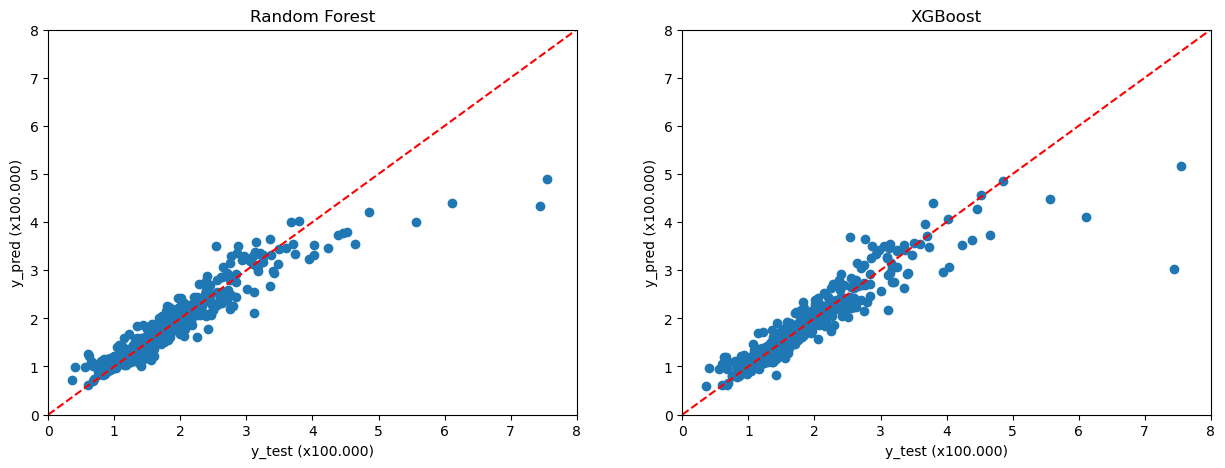

In [29]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rf/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_xgb/100000)
ax[1].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Random Forest')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('XGBoost')

plt.show()

## Fazendo a previsão para a base de teste da competição

In [57]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
# Vamos usar a Regressão Linear para fazer a previsão
y_pred = clf_rf_best.predict(teste)

In [59]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [60]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,125554.642
1,1462,153079.504
2,1463,194073.858


In [61]:
# Podemos então exportar essa base
base_kaggle.to_csv('resultado5_1_rf.csv',index=False)